In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, ComplexHeatmap, factoextra) 

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
pbmc_hla_v_j_gliph <- readr::read_rds(paste0(datapath, "/int_pbmc_hla_v_j_gliph.rds"))

In [7]:
dim(pbmc_hla_v_j_gliph)

[1]  534 8829

In [8]:
table(pbmc_hla_v_j_gliph$Relapse)


  0   1 
431 103 

In [9]:
head(pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TDT,SG%GE,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
302,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,0,0
320,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
322,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
327,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
346,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
347,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0


In [10]:
which(grepl("TRBJ", colnames(pbmc_hla_v_j_gliph)) ) 

[1] 261 262 263 264 265 266 267 268 269 270 271 272 273

In [11]:
colnames(pbmc_hla_v_j_gliph)[273]

[1] "TRBJ2-7"

In [12]:
mymat <- pbmc_hla_v_j_gliph[, 67:273]
mymat <- cbind(mymat, pbmc_hla_v_j_gliph[,c('ATC', 'Naïve%','SCM%','CM%','EM%','TE%','PD1%','LAG3%','TIM3%')])
rownames(mymat) <- pbmc_hla_v_j_gliph$sample_id

In [13]:
head(mymat, 10)

,A*02:01:01,A*01:01:01,A*11:01:01,A*26:01:01,A*31:01:02,A*03:01:01,A*02:05:01,A*23:01:01,A*24:02:01,A*30:01:01,...,TRBJ2-7,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,0,1,0,0,0,1,0,0,0,0,...,0.16279070,0.00,NA,NA,NA,NA,NA,NA,NA,NA
CHP_323_03,0,0,1,0,0,0,0,1,0,0,...,0.21720484,786.24,NA,NA,NA,NA,NA,NA,NA,NA
CHP_323_05,0,0,1,0,0,0,0,1,0,0,...,0.09079952,979.50,NA,NA,NA,NA,NA,NA,NA,NA
CHP_324_05,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.09195095,0.00,NA,NA,NA,NA,NA,NA,NA,NA
CHP_328_04,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.09853712,130.82,NA,NA,NA,NA,NA,NA,NA,NA
CHP_328_05,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.07457350,91.16,NA,NA,NA,NA,NA,NA,NA,NA
CHP_330_05,1,0,0,0,0,0,0,0,0,0,...,0.05790109,0.00,NA,NA,NA,NA,NA,NA,NA,NA
CHP_331_04,1,0,0,1,0,0,0,0,0,0,...,0.11363636,0.00,NA,NA,NA,NA,NA,NA,NA,NA
CHP_331_05,1,0,0,1,0,0,0,0,0,0,...,0.10311419,0.00,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
# remove rows with all NAs
mymat <- mymat[ rowSums(is.na(mymat)) != ncol(mymat), ]
# rmeove those with only 0s and NAs
mymat <- mymat[ rowSums(mymat, na.rm = TRUE) != 0, ]

In [15]:
# sample_df <- as.data.frame(sample_df)
rownames(pbmc_hla_v_j_gliph) <- pbmc_hla_v_j_gliph$sample_id

In [16]:
pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph[ rownames(mymat), ]

In [17]:
dim(pbmc_hla_v_j_gliph)

[1]  393 8829

In [18]:
dim(mymat)

[1] 393 216

# PCA

In [19]:
mymat_narm <- mymat[ rowSums(is.na(mymat)) == 0, ]
pbmc_hla_v_j_gliph_narm <- pbmc_hla_v_j_gliph[ rownames(mymat_narm), ]

In [20]:
head(pbmc_hla_v_j_gliph_narm)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TDT,SG%GE,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,0,0
CHP_343_03,CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,0,0,0,0,0,0,0,0,0,0
CHP_343_04,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,0,0,0,0,0,0
CHP_343_05,CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,0,0,0,0,0,0
CHP_346_01,CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,0,0,0,0,0,0
CHP_347_01,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
myvars <- sort( Rfast::colVars(mymat_narm) , decreasing = TRUE)

In [22]:
length(myvars)

[1] 216

In [23]:
mymat_narm <- mymat_narm[ , names(myvars)[ myvars > 0]]

In [24]:
dim(mymat_narm)
dim(mymat)


[1]  83 212

[1] 393 216

In [25]:
#PCA
pca <- prcomp(mymat_narm, center = TRUE, scale. = TRUE)

In [26]:
head(mymat_narm)

,ATC,TE%,Naïve%,CM%,PD1%,TIM3%,LAG3%,SCM%,EM%,DPA1*01:03:01,...,TRBV21-1,TRBV6-8,TRBV5-3,TRBV16,TRBV1,TRBV7-4,TRBV6-7,TRBV7-1,TRBV7-5,TRBV5-2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,459.04,68.546256,0.0000000,23.4361233,12.158590,12.158590,33.127753,6.6079295,1.40969163,0,...,0.000000000,0,0,0,0,0,0,0,0,0
CHP_343_03,370.30,12.848485,0.2424242,82.0000000,36.060606,36.060606,8.000000,3.9393939,0.96969697,0,...,0.000000000,0,0,0,0,0,0,0,0,0
CHP_343_04,536.63,45.022971,1.5313936,46.5543645,45.022971,45.022971,16.768760,1.3016845,5.58958652,0,...,0.000000000,0,0,0,0,0,0,0,0,0
CHP_343_05,371.20,64.737274,1.2315271,27.0525452,20.402299,20.402299,26.929392,0.7389163,6.23973727,0,...,0.000000000,0,0,0,0,0,0,0,0,0
CHP_346_01,331.70,4.395604,94.6624804,0.7849294,5.180534,5.180534,3.767661,0.1569859,0.00000000,2,...,0.000000000,0,0,0,0,0,0,0,0,0
CHP_347_01,126.72,78.542034,21.1640212,0.2351558,17.930629,17.930629,2.410347,0.0000000,0.05878895,1,...,0.003242122,0,0,0,0,0,0,0,0,0


In [27]:
# plot PCA with factoextra
viz_pca <- fviz_pca_ind(pca,
    col.ind = as.vector(pbmc_hla_v_j_gliph_narm$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE
)

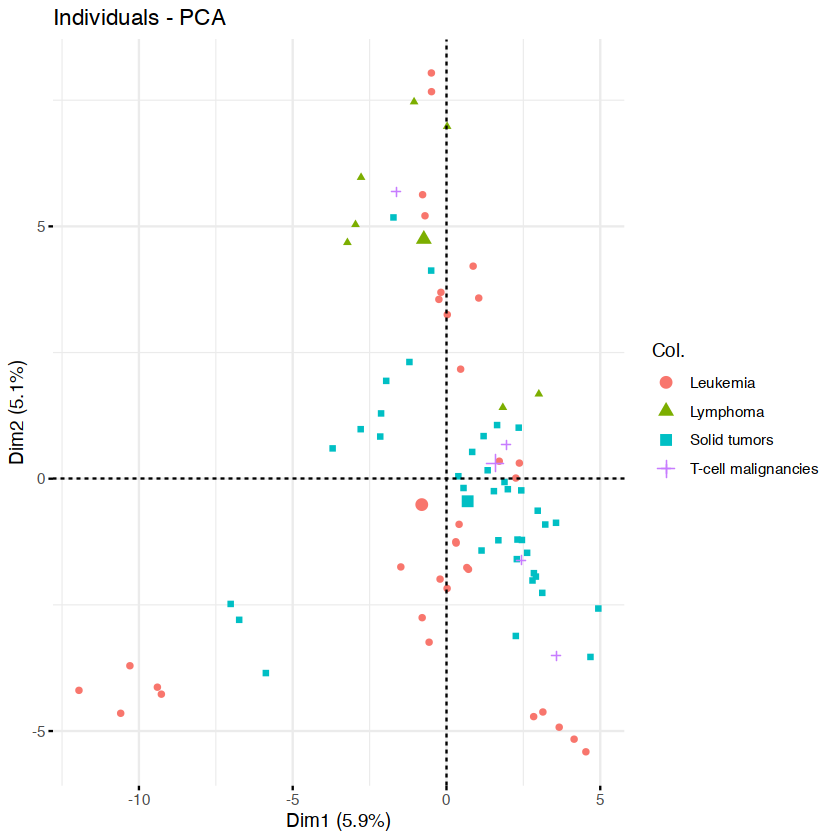

In [28]:
viz_pca# + coord_cartesian(xlim = c(-5, 5), ylim = c(-5, 5) )

In [29]:
dim(mymat_narm)

[1]  83 212

In [32]:
sum( summary(pca)$importance[2,1:2] )

[1] 0.11089

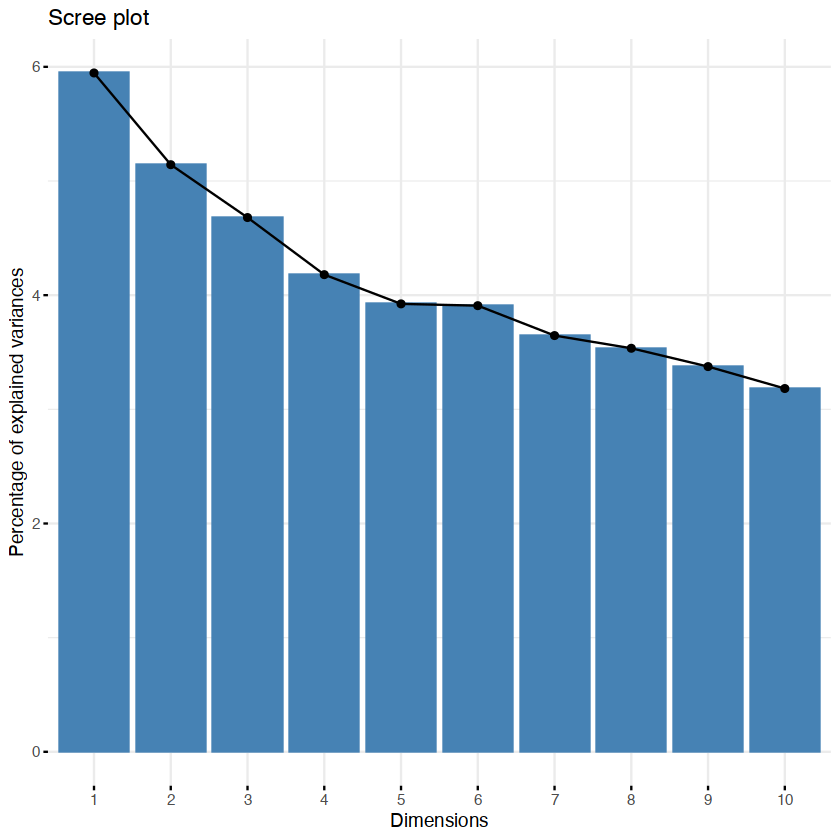

In [31]:
# scree plot
fviz_eig(pca)

In [43]:
myx <- pca$x

In [127]:
mydist <- as.matrix(dist(myx[,1:2]))

In [128]:
head(mydist)

,CHP_343_02,CHP_343_03,CHP_343_04,CHP_343_05,CHP_346_01,CHP_347_01,CHP_347_02,CHP_347_03,CHP_347_04,CHP_347_05,...,CHP_408_03,CHP_409_01,CHP_409_02,CHP_410_01,CHP_413_01,CHP_413_02,CHP_414_03,CHP_415_03,CHP_418_02,CHP_419_02
CHP_343_02,0.0000000,0.65625986,0.59462445,0.3960019,3.121630,6.177300,10.420193,4.965349,4.0846079,6.0056307,...,21.74067,4.147547,3.2205704,5.078321,2.511185,8.133439,15.19833,3.700071,3.7248787,6.551370
CHP_343_03,0.6562599,0.00000000,0.06206209,0.4800202,3.540658,6.429475,10.377537,5.303123,4.4670807,6.3334260,...,21.25700,4.392854,3.7607406,5.271044,2.740526,7.949797,15.03064,4.239271,4.0682796,6.688842
CHP_343_04,0.5946244,0.06206209,0.00000000,0.4276669,3.493135,6.397060,10.372877,5.263057,4.4229948,6.2945790,...,21.29735,4.359935,3.7047054,5.243240,2.706825,7.958237,15.03854,4.183454,4.0270344,6.666596
CHP_343_05,0.3960019,0.48002022,0.42766687,0.0000000,3.067879,6.009208,10.110483,4.852071,4.0030515,5.8865061,...,21.34601,3.971931,3.2829661,4.873746,2.319221,7.776067,14.84783,3.761067,3.6136104,6.319210
CHP_346_01,3.1216300,3.54065837,3.49313464,3.0678787,0.000000,3.273662,8.307593,1.912543,0.9833811,2.9450144,...,21.59755,1.495113,0.9436902,2.461436,1.214331,6.768593,13.46350,1.172630,0.7626114,3.983420
CHP_347_01,6.1773003,6.42947486,6.39705977,6.0092080,3.273662,0.000000,5.512982,1.435617,2.3482424,0.8123458,...,20.24052,2.037526,3.8644325,1.257024,3.691081,5.044866,10.81166,3.654204,2.5319738,1.224473


In [129]:
pbmc_hla_v_j_gliph_narm$cyclenum <- as.numeric(gsub("X0", "", pbmc_hla_v_j_gliph_narm$cycle))

In [130]:
sample_df_narm <- pbmc_hla_v_j_gliph_narm %>% group_by(Patient) %>% 
# order cyclenum
arrange(cyclenum) %>%
ungroup()

In [131]:
pts <- names(which(table(sample_df_narm$Patient) > 1 ))

In [132]:
sample_df_narm$dist <- NA

In [133]:
sample_df_narm <- pbmc_hla_v_j_gliph_narm

In [134]:
for (i in pts) {
    tmp <- sample_df_narm[sample_df_narm$Patient == i, ]
    # tmp <- tmp[ order(tmp$cyclenum, decreasing = F), ]
    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    sample_df_narm$dist[sample_df_narm$Patient == i] <- tmp$dist
}


In [135]:
# sample_df_narm$dist[is.na(sample_df_narm$dist)] <- 0

In [136]:
head(sample_df_narm)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cyclenum,dist
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,2,NA
CHP_343_03,CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,0,0,0,0,0,0,0,0,3,0.65625986
CHP_343_04,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,0,0,0,0,4,0.06206209
CHP_343_05,CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,0,0,0,0,5,0.42766687
CHP_346_01,CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,0,0,0,0,1,NA
CHP_347_01,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,1,NA


In [137]:
allpts <- as.data.frame(table(sample_df_narm$Patient), stringsAsFactors = F)

In [138]:
# sample_df_narm$Relapse[is.na(sample_df_narm$Relapse)] <- 0

In [139]:
# t.test(sample_df_narm$dist[sample_df_narm$dist != 0] ~ sample_df_narm$Relapse[sample_df_narm$dist != 0])

In [140]:
table(sample_df_narm$Patient) ==4

CHP_343 CHP_346 CHP_347 CHP_348 CHP_349 CHP_350 CHP_351 CHP_352 CHP_353 CHP_356 
   TRUE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE 
CHP_357 CHP_358 CHP_361 CHP_362 CHP_363 CHP_364 CHP_365 CHP_367 CHP_368 CHP_369 
  FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE 
CHP_370 CHP_373 CHP_375 CHP_378 CHP_381 CHP_385 CHP_387 CHP_390 CHP_393 CHP_396 
  FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE 
CHP_397 CHP_398 CHP_400 CHP_404 CHP_405 CHP_407 CHP_408 CHP_409 CHP_410 CHP_413 
  FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE 
CHP_414 CHP_415 CHP_418 CHP_419 
  FALSE   FALSE   FALSE   FALSE

In [141]:
sample_df_narm[ sample_df_narm$Patient == "CHP_343",]

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cyclenum,dist
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,2,NA
CHP_343_03,CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,0,0,0,0,0,0,0,0,3,0.65625986
CHP_343_04,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,0,0,0,0,4,0.06206209
CHP_343_05,CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,0,0,0,0,5,0.42766687


In [142]:
sample_df_narm$dist[ sample_df_narm$dist == 0] <- NA

In [143]:
allpts$sumdist <- NA
for(i in 1:nrow(allpts)){
    tmp <- as.data.frame(sample_df_narm[ sample_df_narm$Patient == allpts$Var1[i],] )
    allpts$sumdist[i] <- median(tmp[ tmp$dist != 0, "dist"], na.rm = T)
}

In [144]:
allpts$sumdist_n <- allpts$sumdist / allpts$Freq

In [145]:
head(allpts)

,Var1,Freq,sumdist,sumdist_n
,<chr>,<int>,<dbl>,<dbl>
1,CHP_343,4,0.4276669,0.1069167
2,CHP_346,1,NA,NA
3,CHP_347,5,3.7382362,0.7476472
4,CHP_348,2,1.1545893,0.5772947
5,CHP_349,2,1.7648205,0.8824102
6,CHP_350,5,2.2800715,0.4560143


In [146]:
allpts_no0 <- allpts[ allpts$Freq > 1,]

In [147]:
dim(allpts_no0)

[1] 21  4

In [148]:
mysample_df <- sample_df_narm[ sample_df_narm$Patient %in% allpts_no0$Var1,]

In [149]:
dim(mysample_df)

[1]   60 8831

In [150]:
mypatients <- mysample_df[!duplicated(mysample_df$Patient),]

In [151]:
dim(mypatients)

[1]   21 8831

In [152]:
head(mypatients)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cyclenum,dist
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,2,NA
CHP_347_01,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,1,NA
CHP_348_01,CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,0,0,0,0,1,NA
CHP_349_01,CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,0,0,0,0,1,NA
CHP_350_01,CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,0,0,0,0,1,NA
CHP_353_01,CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,0,0,0,0,0,0,0,1,NA


In [153]:
head(allpts_no0)

,Var1,Freq,sumdist,sumdist_n
,<chr>,<int>,<dbl>,<dbl>
1,CHP_343,4,0.4276669,0.1069167
3,CHP_347,5,3.7382362,0.7476472
4,CHP_348,2,1.1545893,0.5772947
5,CHP_349,2,1.7648205,0.8824102
6,CHP_350,5,2.2800715,0.4560143
9,CHP_353,3,NA,NA


In [154]:
mypatients$sumdist_n <- allpts_no0$sumdist_n[ match(mypatients$Patient, allpts_no0$Var1)]

In [155]:
# tmp$Relapse[ is.na(tmp$Relapse) ] <- 0

In [156]:
dim(mypatients)

[1]   21 8832

In [157]:
head(mypatients)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cyclenum,dist,sumdist_n
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,2,NA,0.1069167
CHP_347_01,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,1,NA,0.7476472
CHP_348_01,CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,0,0,0,1,NA,0.5772947
CHP_349_01,CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,0,0,0,1,NA,0.8824102
CHP_350_01,CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,0,0,0,1,NA,0.4560143
CHP_353_01,CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,0,0,0,0,0,0,1,NA,NA


In [160]:
myfit <- rms::lrm(Relapse ~ sumdist_n*cancergroup, data = mypatients[ mypatients$cancergroup != "T-cell malignancies",])

In [161]:
print(myfit)

Frequencies of Missing Values Due to Each Variable
    Relapse   sumdist_n cancergroup 
          0           3           0 

Logistic Regression Model

rms::lrm(formula = Relapse ~ sumdist_n * cancergroup, data = mypatients[mypatients$cancergroup != 
    "T-cell malignancies", ])


                      Model Likelihood    Discrimination    Rank Discrim.    
                            Ratio Test           Indexes          Indexes    
Obs            17    LR chi2      1.81    R2       0.152    C       0.596    
 0             13    d.f.            5    R2(5,17) 0.000    Dxy     0.192    
 1              4    Pr(> chi2) 0.8742    R2(5,9.2)0.000    gamma   0.192    
max |deriv| 0.001                         Brier    0.169    tau-a   0.074    

                                     Coef    S.E.     Wald Z Pr(>|Z|)
Intercept                            -0.8056   1.2990 -0.62  0.5352  
sumdist_n                            -0.0538   0.4911 -0.11  0.9127  
cancergroup=Lymphoma                 

In [126]:
anova(myfit)

,Chi-Square,d.f.,P
sumdist_n,0.009699905,1,0.9215447
Age,0.085684635,1,0.7697367
TOTAL,0.087780002,2,0.9570592


In [70]:
mypatients <- mypatients[order(mypatients$sumdist_n),]

In [71]:
makematrix_4hm <- function(df, var, name) {
    mymat <- df[[var]]
    names(mymat) <- df[["Patient"]]
    mymat <- t(as.matrix(mymat))
    rownames(mymat) <- name
    return(mymat)
}

In [72]:
mycohort <- makematrix_4hm(mypatients, "Disease_type", "disease")
mysample <- makematrix_4hm(mypatients, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(mypatients, "Relapse", "Relapse")
# myatc <- makematrix_4hm(tmp, "ATC", "ATC")
myage <- makematrix_4hm(mypatients, "Age", "Age")

In [73]:
age_col <- c("blue", "red")
# atc_col <- c("blue", "red")

In [74]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(mypatients$Relapse))

In [75]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [76]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(mypatients$cancergroup))

In [77]:
age_hm <- Heatmap(myage, col = age_col,  height = unit(1,"cm"))
# atc_hm <- Heatmap(myatc, col = atc_col,  height = unit(1,"cm"))

In [78]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col,  height = unit(1,"cm"))

In [79]:
# length(unique(sample_df_narm$Patient))

In [80]:
# tail(sample_df_narm[, c("sample_id", "cycle", "dist")])

In [81]:
# pivot_wider
 
wider_df <- tidyr::pivot_wider(mysample_df, names_from = cycle, values_from = dist, id_cols = Patient) 

wider_df[ wider_df$Patient == "CHP_350",]

Patient,X01,X02,X03,X04,X05
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_350,NA,1.353477,1.153109,1.792926,0.796995


In [82]:
wider_df <- as.data.frame(wider_df)
rownames(wider_df) <- wider_df$Patient
wider_df$Patient <- NULL
wider_df$X01 <- NULL

In [83]:
head(wider_df)

,X02,X03,X04,X05
,<dbl>,<dbl>,<dbl>,<dbl>
CHP_347,3.784079,4.447166,2.970382,7.306350
CHP_348,1.244334,NA,NA,NA
CHP_349,2.620454,NA,NA,NA
CHP_350,1.353477,1.153109,1.792926,0.796995
CHP_353,NA,NA,NA,NA
CHP_357,2.684422,7.861981,2.112505,3.451323


In [84]:
hm1 <- Heatmap(t(scale(wider_df)), cluster_columns = F, name = "dists")

In [85]:
dim(wider_df)

[1] 21  4

In [86]:
hm <- Heatmap(t(scale(mypatients$sumdist_n)), cluster_columns = F)

In [87]:
dim(mypatients)

[1]  21 128

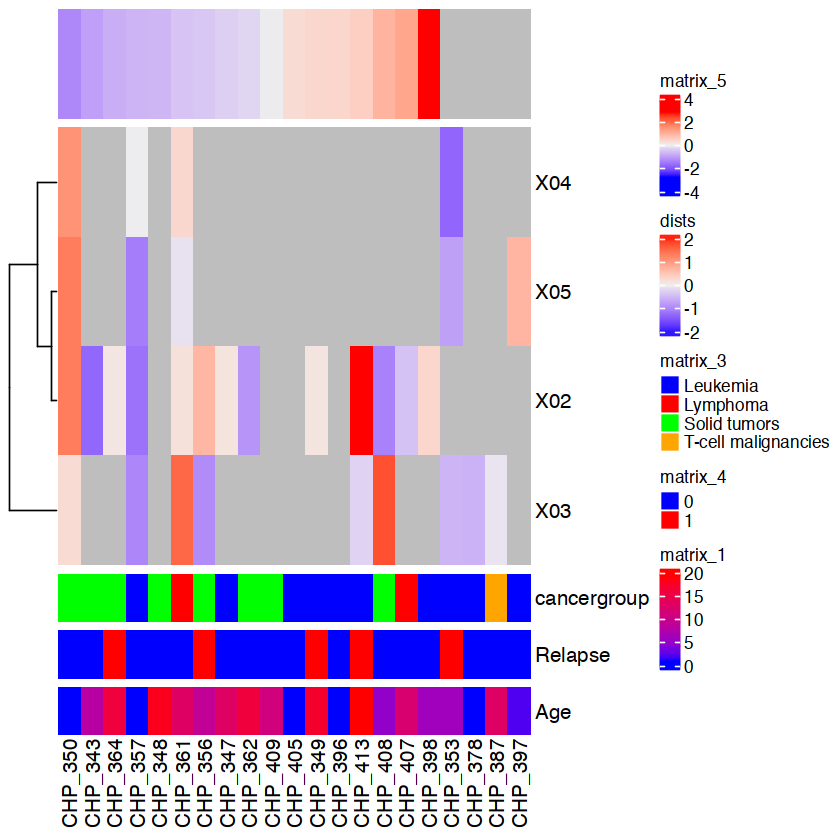

In [88]:
hm %v% hm1 %v% sample_hm %v% group_hm %v% age_hm 

In [89]:
ls()

[1] "addjurkat.fx"       "age_col"            "age_hm"            
 [4] "age_pal"            "align_plots1"       "allpts"            
 [7] "allpts_no0"         "cohort_col"         "cohort_hm"         
[10] "cycle_col"          "datapath"           "distances_df"      
[13] "gitpath"            "group_col"          "group_hm"          
[16] "h4hpath"            "histdenp"           "histp"             
[19] "hm"                 "hm1"                "i"                 
[22] "makematrix_4hm"     "manifestpath"       "message_parallel"  
[25] "myage"              "myaxis"             "mycohort"          
[28] "mycols"             "mydiff"             "mydist"            
[31] "myfit"              "mygroup"            "mymat"             
[34] "mymat_narm"         "mypatients"         "myplot"            
[37] "mysample"           "mysample_df"        "myx"               
[40] "pca"                "plotpath"           "pts"               
[43] "safe_mclapply"      "sample_df"          "sample_df_narm"    
[46] "sample_hm"          "sampletags_columns" "text_matrix"       
[49] "tmp"                "toString_onefle.fx" "type_col"          
[52] "viz_pca"            "wider_df"

In [90]:
rm(tmp, wider_df, pts, myx, mysample, mysample_df, allpts, allpts_no0, distances_df, hm, hm1, i, mydiff, mydist, myfit, mymat_narm, pca, sample_df_narm)

# Impute with imputePCA

In [91]:
library(VIM)
library(FactoMineR)
library(missMDA)

Loading required package: colorspace



The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:ComplexHeatmap’:

    prepare


The following object is masked from ‘package:datasets’:

    sleep




In [92]:
dim(mymat)

[1] 368  27

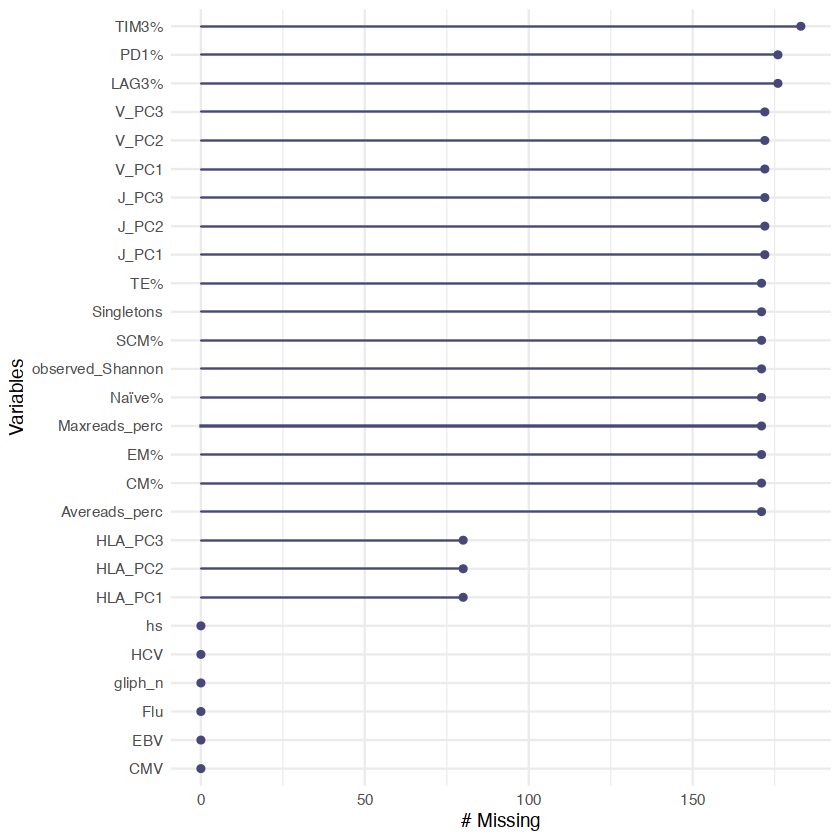

In [93]:
naniar::gg_miss_var(mymat)


 Variables sorted by number of missings: 
         Variable     Count
            TIM3% 0.4972826
             PD1% 0.4782609
            LAG3% 0.4782609
            V_PC1 0.4673913
            V_PC2 0.4673913
            V_PC3 0.4673913
            J_PC1 0.4673913
            J_PC2 0.4673913
            J_PC3 0.4673913
           Naïve% 0.4646739
             SCM% 0.4646739
              CM% 0.4646739
              EM% 0.4646739
              TE% 0.4646739
       Singletons 0.4646739
 observed_Shannon 0.4646739
    Avereads_perc 0.4646739
    Maxreads_perc 0.4646739
          HLA_PC1 0.2173913
          HLA_PC2 0.2173913
          HLA_PC3 0.2173913
          gliph_n 0.0000000
              CMV 0.0000000
              EBV 0.0000000
              HCV 0.0000000
              Flu 0.0000000
               hs 0.0000000


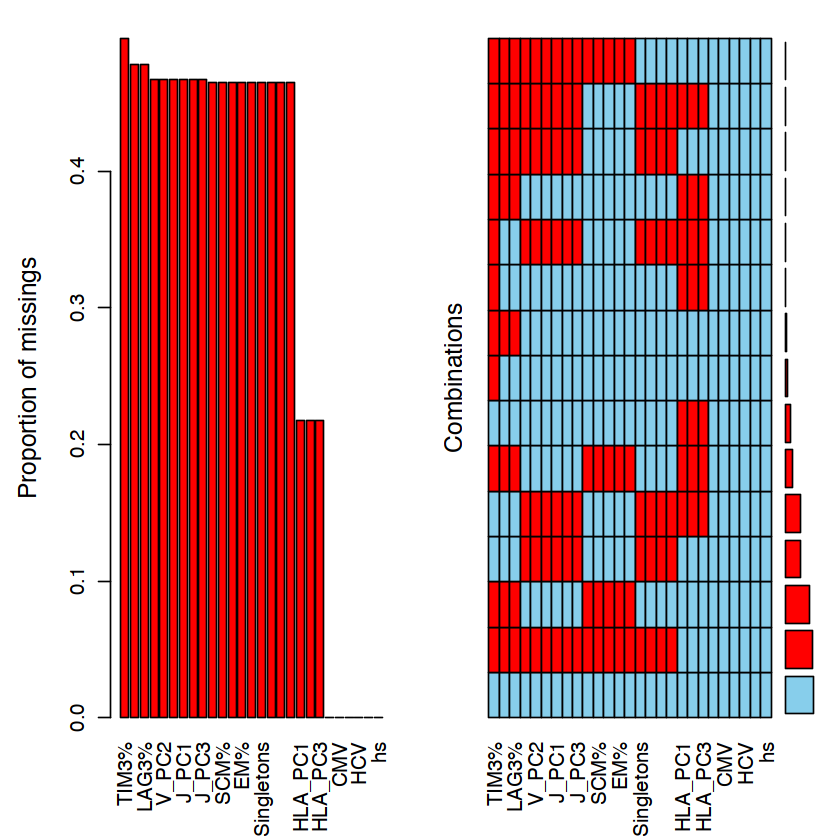

In [94]:
res <- summary(aggr(mymat, sortVar=TRUE))$combinations

In [95]:
# matrixplot(mymat, sortby = 2)

In [96]:
nb <- estim_ncpPCA(mymat, method.cv = "Kfold", verbose = FALSE) 
nb$ncp

[1] 5

In [97]:
res.comp <- imputePCA(mymat, ncp = 5, maxiter = 1000) 
res.comp$completeObs[1:3,]

,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,Singletons,observed_Shannon,...,J_PC2,J_PC3,gliph_n,CMV,EBV,HCV,Flu,hs,Avereads_perc,Maxreads_perc
CHP_319_05,6.109858,-2.197228,23.183148,6.973051,65.95288,22.36506,18.378599,22.65916,3,11.878,...,0.10597079,0.10273846,11,0,0,0,0,0,0.066666667,0.16455696
CHP_323_03,31.347845,12.540912,17.642620,4.959258,33.53787,23.40408,11.648867,23.47795,1,37.722,...,0.27874403,-0.04336827,20,2,1,1,6,0,0.022222222,0.06929134
CHP_323_05,31.863492,8.873894,9.789253,5.309200,44.17846,13.47130,7.860304,13.57885,10,81.753,...,-0.01978973,-0.17319364,96,13,7,0,4,0,0.006535948,0.14356436


In [98]:
dim(res.comp$completeObs)
dim(mymat)

[1] 368  27

[1] 368  27

In [99]:
dim(sample_df)

[1] 368 126

In [100]:
imp <- cbind.data.frame(res.comp$completeObs, sample_df$cancergroup)

In [101]:
dim(imp)

[1] 368  28

In [102]:
head(imp)

,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,Singletons,observed_Shannon,...,J_PC3,gliph_n,CMV,EBV,HCV,Flu,hs,Avereads_perc,Maxreads_perc,sample_df$cancergroup
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CHP_319_05,6.109858,-2.197228,23.183148,6.973051,65.95288,22.365064,18.378599,22.659163,3,11.878,...,0.10273846,11,0,0,0,0,0,0.066666667,0.16455696,Leukemia
CHP_323_03,31.347845,12.540912,17.642620,4.959258,33.53787,23.404077,11.648867,23.477953,1,37.722,...,-0.04336827,20,2,1,1,6,0,0.022222222,0.06929134,Leukemia
CHP_323_05,31.863492,8.873894,9.789253,5.309200,44.17846,13.471296,7.860304,13.578850,10,81.753,...,-0.17319364,96,13,7,0,4,0,0.006535948,0.14356436,Leukemia
CHP_324_05,27.066330,5.747687,15.716082,7.234122,44.25841,18.202117,12.351636,18.350050,7,129.919,...,0.10260197,176,28,4,1,3,4,0.004366812,0.06242062,T-cell malignancies
CHP_328_04,23.818605,2.385482,18.282504,7.511188,48.03147,19.093381,16.071229,19.307554,26,223.747,...,0.36872989,301,43,14,4,5,6,0.002202643,0.03737986,Leukemia
CHP_328_05,18.559919,4.398075,6.092878,5.280664,65.67340,7.814507,8.025405,8.012111,6,87.321,...,-0.22996124,99,24,5,2,7,0,0.006535948,0.03402485,Leukemia


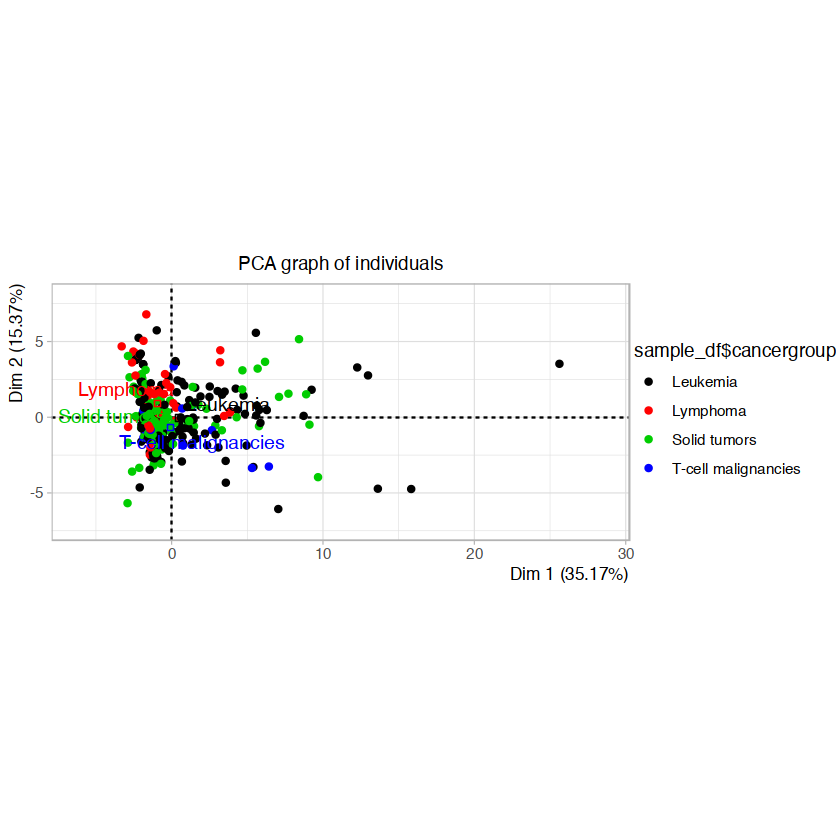

In [103]:
res.pca <- PCA(imp, quali.sup = 28, ncp = 5, graph=FALSE)
plot(res.pca, hab=28, lab="quali");

In [104]:
# plot PCA with factoextra
library(factoextra)
viz_pca <- fviz_pca_ind(res.pca,
    col.ind = as.vector(sample_df$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE
)

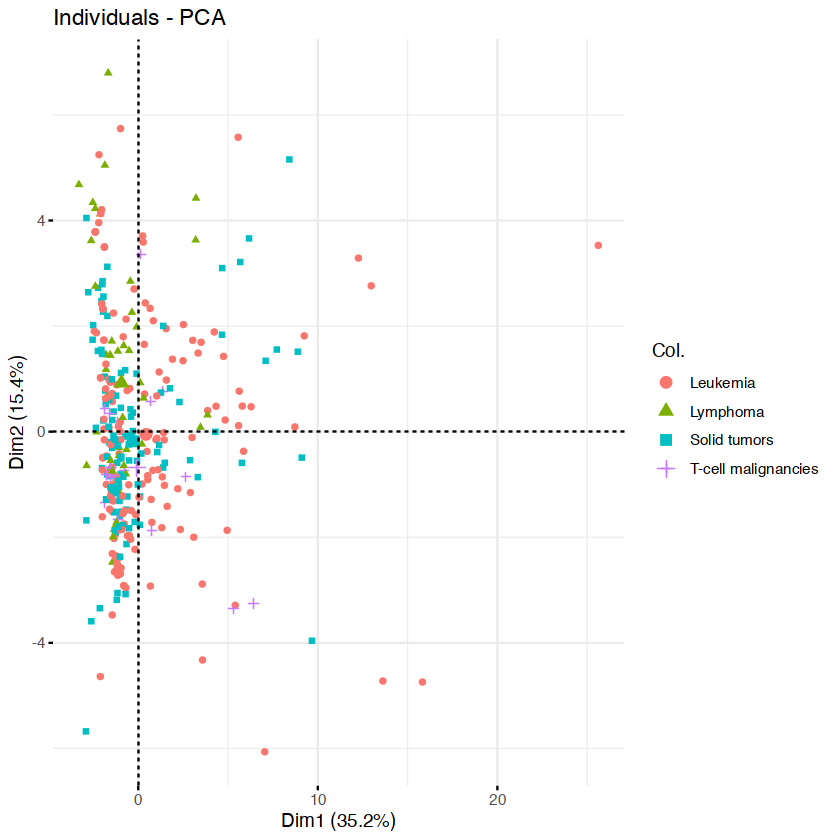

In [105]:
viz_pca

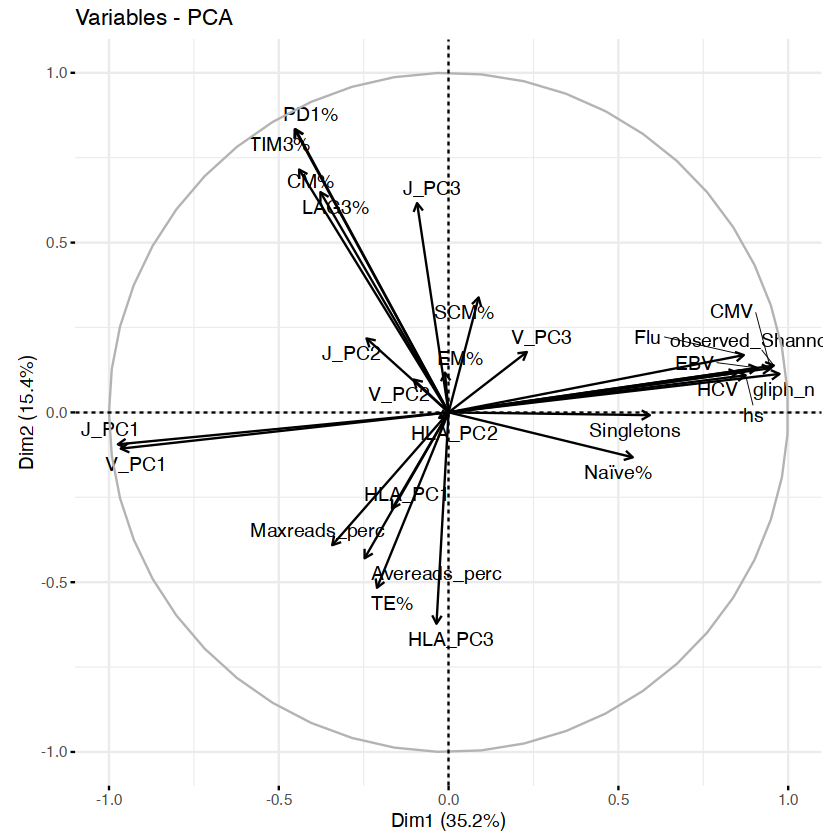

In [106]:
fviz_pca_var(res.pca,
    # col.ind = as.vector(tmp$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    repel = TRUE
)

In [107]:
myx <- res.pca$ind$coord

In [109]:
head(myx)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
CHP_319_05,-1.9092696,0.05151892,-0.03807804,2.4650090,-0.1619469
CHP_323_03,-0.6162533,0.77767312,0.80461590,-1.2708308,0.1252195
CHP_323_05,0.4912034,-0.37446680,0.48037108,-0.6885728,-0.1876195
CHP_324_05,1.3675427,0.76500626,0.31328307,0.5287689,-0.6226906
CHP_328_04,4.2339247,1.88858231,-0.40896697,2.2590651,-0.4565966
CHP_328_05,1.3431330,-0.85645779,-1.18742497,0.4718746,-0.7450126


In [110]:
mydist <- as.matrix(dist(myx[,1:2]))

In [111]:
myave <- as.matrix(rowMeans(myx[,1:2]))

In [112]:
head(myave)

CHP_319_05,-0.92887533
CHP_323_03,0.08070991
CHP_323_05,0.05836830
CHP_324_05,1.06627446
CHP_328_04,3.06125348
CHP_328_05,0.24333761


In [113]:
head(mydist)

,CHP_319_05,CHP_323_03,CHP_323_05,CHP_324_05,CHP_328_04,CHP_328_05,CHP_330_05,CHP_331_04,CHP_331_05,CHP_335_03,...,CHP_428_01,CHP_428_02,CHP_429_01,CHP_429_02,CHP_430_01,CHP_430_02,CHP_431_01,CHP_432_01,CHP_433_01,CHP_434_01
CHP_319_05,0.000000,1.482967,2.4379775,3.353590,6.411992,3.3767654,2.3841906,2.124806,2.9491730,3.0001228,...,1.926266,2.258237,3.353313,1.167646,0.7050734,2.106612,1.104002,1.363537,1.033657,0.9293595
CHP_323_03,1.482967,0.000000,1.5980884,1.983836,4.975776,2.5513876,2.1296804,2.531701,2.4568626,2.0399309,...,2.281434,1.653570,3.856147,2.055876,1.6108229,2.879032,1.293947,2.024161,1.791294,1.7284199
CHP_323_05,2.437977,1.598088,0.0000000,1.437487,4.373712,0.9788255,0.9364423,1.872382,0.9377974,0.5675931,...,1.686698,3.218058,2.955248,2.146071,2.0330013,2.489015,1.433857,1.906334,1.933936,1.9589481
CHP_324_05,3.353590,1.983836,1.4374872,0.000000,3.078728,1.6216478,2.3591487,3.306496,2.1486861,1.1924939,...,3.110836,3.118332,4.365057,3.434244,3.1843892,3.906914,2.618985,3.242012,3.187008,3.1814642
CHP_328_04,6.411992,4.975776,4.3737117,3.078728,0.000000,3.9864673,5.1737567,6.194721,4.7339533,3.9063548,...,6.039419,5.621937,7.002814,6.484982,6.2611097,6.841433,5.687562,6.269095,6.247143,6.2486792
CHP_328_05,3.376765,2.551388,0.9788255,1.621648,3.986467,0.0000000,1.2939830,2.303486,0.7554188,0.5491002,...,2.204858,4.125853,3.020171,2.893448,2.8944280,2.969146,2.313834,2.612011,2.729087,2.7775111


In [114]:
mydist[ grepl("CHP_323", rownames(mydist)), grepl("CHP_323", colnames(mydist))]

,CHP_323_03,CHP_323_05,CHP_323_01,CHP_323_02
CHP_323_03,0.0000000,1.598088,0.9522786,0.9522786
CHP_323_05,1.5980884,0.000000,2.4316989,2.4316989
CHP_323_01,0.9522786,2.431699,0.0000000,0.0000000
CHP_323_02,0.9522786,2.431699,0.0000000,0.0000000


In [115]:
sample_df <- sample_df %>% group_by(Patient) %>% 
# order cyclenum
arrange(cyclenum) %>%
ungroup()

In [116]:
pts <- names(which(table(sample_df$Patient) > 1 ))

In [117]:
(pts)

[1] "CHP_319" "CHP_323" "CHP_328" "CHP_329" "CHP_330" "CHP_331" "CHP_332"
 [8] "CHP_338" "CHP_339" "CHP_340" "CHP_343" "CHP_344" "CHP_345" "CHP_346"
[15] "CHP_347" "CHP_348" "CHP_349" "CHP_350" "CHP_351" "CHP_352" "CHP_353"
[22] "CHP_355" "CHP_356" "CHP_357" "CHP_358" "CHP_359" "CHP_360" "CHP_361"
[29] "CHP_362" "CHP_363" "CHP_364" "CHP_365" "CHP_366" "CHP_367" "CHP_368"
[36] "CHP_369" "CHP_370" "CHP_373" "CHP_374" "CHP_375" "CHP_376" "CHP_378"
[43] "CHP_380" "CHP_381" "CHP_382" "CHP_383" "CHP_385" "CHP_386" "CHP_387"
[50] "CHP_388" "CHP_389" "CHP_390" "CHP_391" "CHP_392" "CHP_393" "CHP_394"
[57] "CHP_395" "CHP_396" "CHP_397" "CHP_398" "CHP_399" "CHP_400" "CHP_401"
[64] "CHP_402" "CHP_403" "CHP_404" "CHP_405" "CHP_406" "CHP_407" "CHP_408"
[71] "CHP_409" "CHP_410" "CHP_411" "CHP_412" "CHP_413" "CHP_414" "CHP_415"
[78] "CHP_417" "CHP_418" "CHP_419" "CHP_420" "CHP_421" "CHP_422" "CHP_423"
[85] "CHP_424" "CHP_425" "CHP_426" "CHP_428" "CHP_429" "CHP_430"

In [118]:
sample_df$dist <- NA

In [119]:
for (i in pts) {
    tmp <- sample_df[sample_df$Patient == i, ]
    # tmp <- tmp[ order(tmp$cyclenum, decreasing = F), ]
    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    sample_df$dist[sample_df$Patient == i] <- tmp$dist
}


In [120]:
# sample_df$dist[is.na(sample_df$dist)] <- 0

In [121]:
allpts <- as.data.frame(table(sample_df$Patient), stringsAsFactors = F)

In [122]:
head(allpts)

,Var1,Freq
,<chr>,<int>
1,CHP_319,5
2,CHP_323,4
3,CHP_324,1
4,CHP_328,2
5,CHP_329,4
6,CHP_330,5


In [123]:
colnames(sample_df)

[1] "sample_id"                "Patient"                 
  [3] "cycle"                    "FOLD"                    
  [5] "ATC"                      "Age"                     
  [7] "Disease_type"             "TE_fold"                 
  [9] "CD3"                      "EM"                      
 [11] "CM"                       "Naïve"                   
 [13] "SCM"                      "TE"                      
 [15] "EM%"                      "CM%"                     
 [17] "Naïve%"                   "SCM%"                    
 [19] "TE%"                      "Naïve/TE"                
 [21] "N+CM+SCM/TE+EM"           "PD-1"                    
 [23] "PDL1"                     "LAG3"                    
 [25] "TIM3"                     "CTLA4"                   
 [27] "PD1%"                     "PDL1%"                   
 [29] "LAG3%"                    "TIM3%"                   
 [31] "CTLA4%"                   "Any NCR"                 
 [33] "PD1 + LAG3 + TIM3"        "cancergroup"             
 [35] "agegroup"                 "foldgroup"               
 [37] "Remission"                "Relapse"                 
 [39] "Transplant"               "CART"                    
 [41] "vital_status"             "LOF"                     
 [43] "TRB"                      "Reads"                   
 [45] "CPKR"                     "Average_reads"           
 [47] "VMR"                      "Max_reads"               
 [49] "Singletons"               "Doubletons"              
 [51] "qD"                       "Sample_Coverage"         
 [53] "observed_Richness"        "estimated_Richness"      
 [55] "SE_Richeness"             "observed_Shannon"        
 [57] "estimated_Shannon"        "SE_Shannon"              
 [59] "observed_Simpson"         "estimated_Simpson"       
 [61] "SE_Simpson"               "basename"                
 [63] "file"                     "sampletype"              
 [65] "Group"                    "log10shann"              
 [67] "aveTiRP"                  "medTiRP"                 
 [69] "HLA_PC1"                  "HLA_PC2"                 
 [71] "HLA_PC3"                  "V_PC1"                   
 [73] "V_PC2"                    "V_PC3"                   
 [75] "J_PC1"                    "J_PC2"                   
 [77] "J_PC3"                    "samplename"              
 [79] "gliph_n"                  "CMV"                     
 [81] "EBV"                      "HCV"                     
 [83] "Flu"                      "hs"                      
 [85] "cfDNA_TRB"                "cfDNA_Reads"             
 [87] "cfDNA_CPKR"               "cfDNA_Average_reads"     
 [89] "cfDNA_VMR"                "cfDNA_Max_reads"         
 [91] "cfDNA_Singletons"         "cfDNA_Doubletons"        
 [93] "cfDNA_qD"                 "cfDNA_Sample_Coverage"   
 [95] "cfDNA_observed_Richness"  "cfDNA_estimated_Richness"
 [97] "cfDNA_SE_Richeness"       "cfDNA_observed_Shannon"  
 [99] "cfDNA_estimated_Shannon"  "cfDNA_SE_Shannon"        
[101] "cfDNA_observed_Simpson"   "cfDNA_estimated_Simpson" 
[103] "cfDNA_SE_Simpson"         "cfDNA_basename"          
[105] "cfDNA_file"               "cfDNA_sampletype"        
[107] "cfDNA_Group"              "cfDNA_log10shann"        
[109] "cfDNA_aveTiRP"            "cfDNA_medTiRP"           
[111] "cfDNA_V_PC1"              "cfDNA_V_PC2"             
[113] "cfDNA_V_PC3"              "cfDNA_J_PC1"             
[115] "cfDNA_J_PC2"              "cfDNA_J_PC3"             
[117] "cfDNA_samplename"         "cfDNA_gliph_n"           
[119] "cfDNA_CMV"                "cfDNA_EBV"               
[121] "cfDNA_HCV"                "cfDNA_Flu"               
[123] "cfDNA_hs"                 "cyclenum"                
[125] "Avereads_perc"            "Maxreads_perc"           
[127] "dist"

In [124]:
sample_df[ sample_df$Patient == "CHP_323", ]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_gliph_n,cfDNA_CMV,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,Avereads_perc,Maxreads_perc,dist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_323_01,CHP_323,X01,0,154.75,1,HR ALL,0,0,NA,...,NA,NA,NA,NA,NA,NA,1,NA,NA,NA
CHP_323_02,CHP_323,X02,0,1397.28,1,HR ALL,0,0,NA,...,NA,NA,NA,NA,NA,NA,2,NA,NA,0.0000000
CHP_323_03,CHP_323,X03,0,786.24,1,HR ALL,0,0,NA,...,71,8,2,0,5,1,3,0.022222222,0.06929134,0.9522786
CHP_323_05,CHP_323,X05,0,979.50,1,HR ALL,0,0,NA,...,9,0,0,0,0,0,5,0.006535948,0.14356436,NA


In [125]:
head(mymat[grepl("CHP_329", rownames(mymat)),10:20])

,observed_Shannon,HLA_PC1,HLA_PC2,HLA_PC3,V_PC1,V_PC2,V_PC3,J_PC1,J_PC2,J_PC3,gliph_n
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_329_01,NA,-4.3157,0.01793391,-4.28779,NA,NA,NA,NA,NA,NA,0
CHP_329_02,NA,-4.3157,0.01793391,-4.28779,NA,NA,NA,NA,NA,NA,0
CHP_329_03,NA,-4.3157,0.01793391,-4.28779,NA,NA,NA,NA,NA,NA,0
CHP_329_05,NA,-4.3157,0.01793391,-4.28779,NA,NA,NA,NA,NA,NA,0


In [126]:
# tmp <- sample_df[ which(sample_df$cycle == "X02"),]

In [129]:
# myfit <- rms::lrm( Relapse ~ dist, data = tmp[ tmp$cancergroup == "Leukemia",])

In [130]:
# print(myfit)

In [131]:
# sample_df <- sample_df[ which(sample_df$cycle != "X02"),]

In [132]:
sample_df <- as.data.frame(sample_df)

In [133]:
head(allpts)

,Var1,Freq
,<chr>,<int>
1,CHP_319,5
2,CHP_323,4
3,CHP_324,1
4,CHP_328,2
5,CHP_329,4
6,CHP_330,5


In [134]:
allpts$sumdist <- NA
allpts$meddist <- NA
for(i in 1:nrow(allpts)){
    tmp <- as.data.frame(sample_df[ sample_df$Patient == allpts$Var1[i],] )
    allpts$sumdist[i] <- sum(tmp[, "dist"], na.rm = T)
    allpts$meddist[i] <- median(tmp[ tmp$dist != 0, "dist"], na.rm = T)
}

In [135]:
# sample_df[ sample_df$Patient == allpts$Var1[i], "dist"]

In [136]:
allpts$sumdist_n <- allpts$sumdist / allpts$Freq
allpts$meddist_n <- allpts$meddist / allpts$Freq


In [137]:
head(allpts)

,Var1,Freq,sumdist,meddist,sumdist_n,meddist_n
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_319,5,0.5470703,0.5470703,0.1094141,0.1094141
2,CHP_323,4,0.9522786,0.9522786,0.2380697,0.2380697
3,CHP_324,1,0.0000000,NA,0.0000000,NA
4,CHP_328,2,3.9864673,3.9864673,1.9932336,1.9932336
5,CHP_329,4,0.0000000,NA,0.0000000,NA
6,CHP_330,5,5.2269589,1.3171718,1.0453918,0.2634344


In [138]:
allpts_no0 <- allpts[ which(allpts$Freq > 1),]

In [139]:
head(allpts_no0)

,Var1,Freq,sumdist,meddist,sumdist_n,meddist_n
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_319,5,0.5470703,0.5470703,0.1094141,0.1094141
2,CHP_323,4,0.9522786,0.9522786,0.2380697,0.2380697
4,CHP_328,2,3.9864673,3.9864673,1.9932336,1.9932336
5,CHP_329,4,0.0000000,NA,0.0000000,NA
6,CHP_330,5,5.2269589,1.3171718,1.0453918,0.2634344
7,CHP_331,5,1.7854542,0.8927271,0.3570908,0.1785454


In [140]:
allpts_no0 <- allpts[ which(allpts$sumdist > 0),]

In [141]:
# allpts_no0 <- allpts_no0[order(allpts_no0$sumdist_n),]

In [142]:
mysample_df <- sample_df[ sample_df$Patient %in% allpts_no0$Var1,]

In [143]:
head(allpts_no0)

,Var1,Freq,sumdist,meddist,sumdist_n,meddist_n
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_319,5,0.5470703,0.5470703,0.1094141,0.1094141
2,CHP_323,4,0.9522786,0.9522786,0.2380697,0.2380697
4,CHP_328,2,3.9864673,3.9864673,1.9932336,1.9932336
6,CHP_330,5,5.2269589,1.3171718,1.0453918,0.2634344
7,CHP_331,5,1.7854542,0.8927271,0.3570908,0.1785454
8,CHP_332,5,6.3139018,1.5891396,1.2627804,0.3178279


In [144]:
mypatients <- mysample_df[!duplicated(mysample_df$Patient),]

In [145]:
# tmp <- sample_df[ sample_df$cycle == "X04",]

In [146]:
head(allpts_no0)

,Var1,Freq,sumdist,meddist,sumdist_n,meddist_n
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_319,5,0.5470703,0.5470703,0.1094141,0.1094141
2,CHP_323,4,0.9522786,0.9522786,0.2380697,0.2380697
4,CHP_328,2,3.9864673,3.9864673,1.9932336,1.9932336
6,CHP_330,5,5.2269589,1.3171718,1.0453918,0.2634344
7,CHP_331,5,1.7854542,0.8927271,0.3570908,0.1785454
8,CHP_332,5,6.3139018,1.5891396,1.2627804,0.3178279


In [147]:
mypatients$sumdist_n <- allpts_no0$sumdist_n[ match(mypatients$Patient, allpts_no0$Var1)]
mypatients$meddist_n <- allpts_no0$meddist_n[ match(mypatients$Patient, allpts_no0$Var1)]

mypatients$sumdist <- allpts_no0$sumdist[ match(mypatients$Patient, allpts_no0$Var1)]
mypatients$meddist <- allpts_no0$meddist[ match(mypatients$Patient, allpts_no0$Var1)]

In [148]:
# mypatients <- mypatients[order(mypatients$sumdist_n),]

In [149]:
dim(mypatients)

[1]  81 131

In [150]:
mypatients$Relapse[is.na(mypatients$Relapse)] <- 0

In [155]:
head(mypatients)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_Flu,cfDNA_hs,cyclenum,Avereads_perc,Maxreads_perc,dist,sumdist_n,meddist_n,sumdist,meddist
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,NA,NA,1,0.028571429,0.09716599,NA,0.2672483,0.2672483,1.336241,1.336241
2,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,1,0.006410256,0.03983657,NA,3.7012640,0.7654901,18.506320,3.827451
3,CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,1,0.011111111,0.05147059,NA,0.5655743,0.5655743,1.131149,1.131149
4,CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,1,0.055555556,0.17004831,NA,0.9694325,0.4847163,4.847163,2.423581
5,CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,NA,NA,1,0.006535948,0.03582271,NA,1.1236870,0.2913978,5.618435,1.456989
10,CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,2,1,0.003344482,0.01241912,NA,3.2733345,0.7024551,16.366673,3.512275


In [192]:
myfit <- rms::lrm( Relapse ~ sumdist  , data = mypatients[ mypatients$cancergroup == "Leukemia",])

In [193]:
myfit

Logistic Regression Model

rms::lrm(formula = Relapse ~ sumdist, data = mypatients[mypatients$cancergroup == 
    "Leukemia", ])

                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            39    LR chi2      5.05     R2       0.191    C       0.690    
 0             31    d.f.            1     R2(1,39) 0.099    Dxy     0.379    
 1              8    Pr(> chi2) 0.0246    R2(1,19.1)0.191    gamma   0.379    
max |deriv| 1e-07                          Brier    0.137    tau-a   0.127    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept -2.3539 0.6856 -3.43  0.0006  
sumdist    0.0869 0.0436  1.99  0.0465  


Boxplot of cancergroups

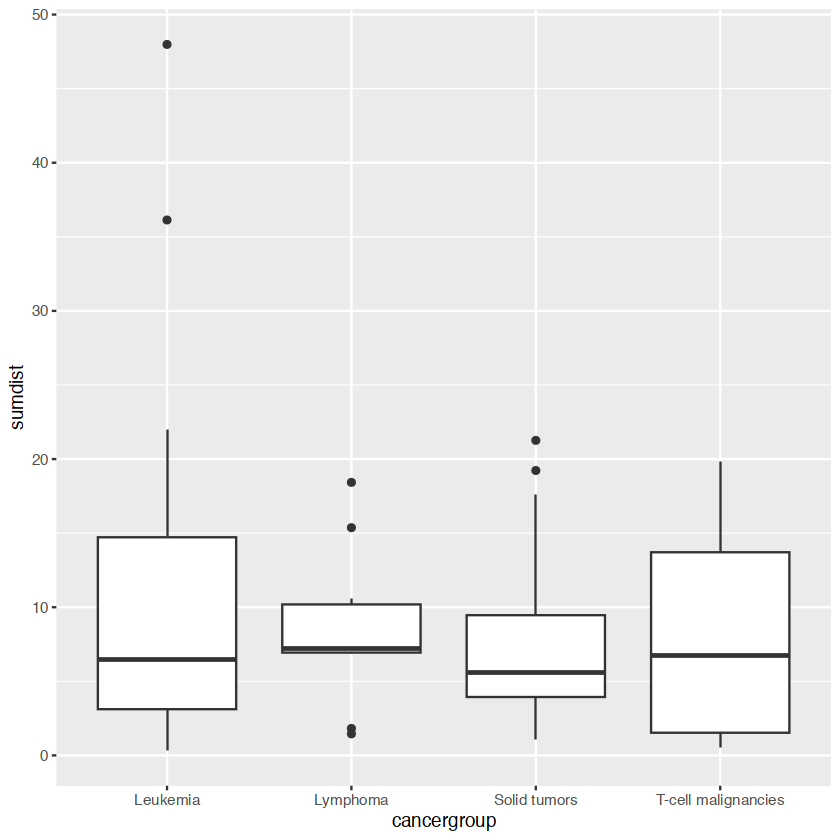

In [172]:
ggplot(mypatients, aes( x = cancergroup, y = sumdist)) + geom_boxplot()

PCA paths

In [93]:
sample_df$Dim1 <- myx[ match(sample_df$sample_id, rownames(myx)),1]
sample_df$Dim2 <- myx[ match(sample_df$sample_id, rownames(myx)),2]

In [94]:
head(sample_df)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,Avereads_perc,Maxreads_perc,dist,Dim1,Dim2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,NA,NA,NA,NA,1,0.028571429,0.09716599,NA,-0.1934348,-1.71166932
2,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,1,0.006410256,0.03983657,NA,0.2151346,-0.99257816
3,CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,1,0.011111111,0.05147059,NA,-0.3024969,0.01052608
4,CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,1,0,0,1,0.055555556,0.17004831,NA,-1.3924838,-0.99884560
5,CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,NA,NA,NA,NA,1,0.006535948,0.03582271,NA,1.3881835,-0.68028148
6,CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,NA,NA,NA,NA,1,0.052631579,0.19034091,NA,-1.4432948,-2.30983780


In [95]:
median(mypatients$meddist)

[1] 2.593613

In [106]:
head(mypatients[order(mypatients$meddist),],20)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_Flu,cfDNA_hs,cyclenum,Avereads_perc,Maxreads_perc,dist,sumdist_n,meddist_n,sumdist,meddist
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
77,CHP_421_01,CHP_421,X01,18.3,0.00,8,ALL,18.3,2416,50,...,1,0,1,NA,NA,NA,0.1280569,0.06402845,0.3841707,0.1920854
70,CHP_395_01,CHP_395,X01,2.7,5875.96,11,T-ALL,2.7,3003,0,...,0,0,1,NA,NA,NA,0.1081393,0.05406964,0.5406964,0.2703482
78,CHP_424_01,CHP_424,X01,0.9,NA,1,ALL,0.9,852,92,...,NA,NA,1,NA,NA,NA,0.1667744,0.16677441,0.3335488,0.3335488
149,CHP_406_02,CHP_406,X02,1.5,0.00,0,AML,1.5,178,0,...,NA,NA,2,NA,NA,NA,0.1900731,0.19007310,0.3801462,0.3801462
45,CHP_319_01,CHP_319,X01,1.4,0.00,1,HR ALL,1.4,0,NA,...,NA,NA,1,NA,NA,NA,0.1094141,0.10941406,0.5470703,0.5470703
17,CHP_367_01,CHP_367,X01,1.8,3004.65,14,HR ALL,1.8,671,15,...,NA,NA,1,0.026315789,0.08812950,NA,0.3785805,0.18929026,1.5143221,0.7571611
34,CHP_409_01,CHP_409,X01,2.9,156.78,11,EWS,2.9,2291,670,...,NA,NA,1,0.007874016,0.05567227,NA,0.8731383,0.17664473,4.3656914,0.8832236
49,CHP_331_01,CHP_331,X01,0.0,0.00,5,SR ALL,0.0,0,NA,...,NA,NA,1,NA,NA,NA,0.3570908,0.17854542,1.7854542,0.8927271
54,CHP_344_01,CHP_344,X01,0.0,247.80,6,BL,0.0,0,NA,...,1,0,1,NA,NA,NA,0.4544668,0.22723339,1.8178671,0.9089336


In [97]:
head(sample_df[ sample_df$Patient == "CHP_359",])

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,Avereads_perc,Maxreads_perc,dist,Dim1,Dim2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
97,CHP_359_02,CHP_359,X02,0,0,15,AML,0,0,NA,...,0,1,0,1,2,0.0018348624,0.020773313,NA,5.566597,5.576218
172,CHP_359_03,CHP_359,X03,0,0,15,AML,0,0,NA,...,0,0,0,1,3,0.0004470273,0.007103717,20.158542,25.620876,3.528604
245,CHP_359_04,CHP_359,X04,0,0,15,AML,0,0,NA,...,0,0,0,0,4,0.0027247956,0.012500000,22.380093,3.333946,1.488665
341,CHP_359_05,CHP_359,X05,0,0,15,AML,0,0,NA,...,NA,NA,NA,NA,5,NA,NA,5.444586,-2.030326,2.420384


In [98]:
sample_df <- sample_df %>% group_by(Patient) %>% 
# order cyclenum
arrange(cyclenum) %>%
ungroup()

In [99]:
sample_df$cycle <- factor(sample_df$cycle)

In [100]:
levels(sample_df$cycle)

[1] "X01" "X02" "X03" "X04" "X05"

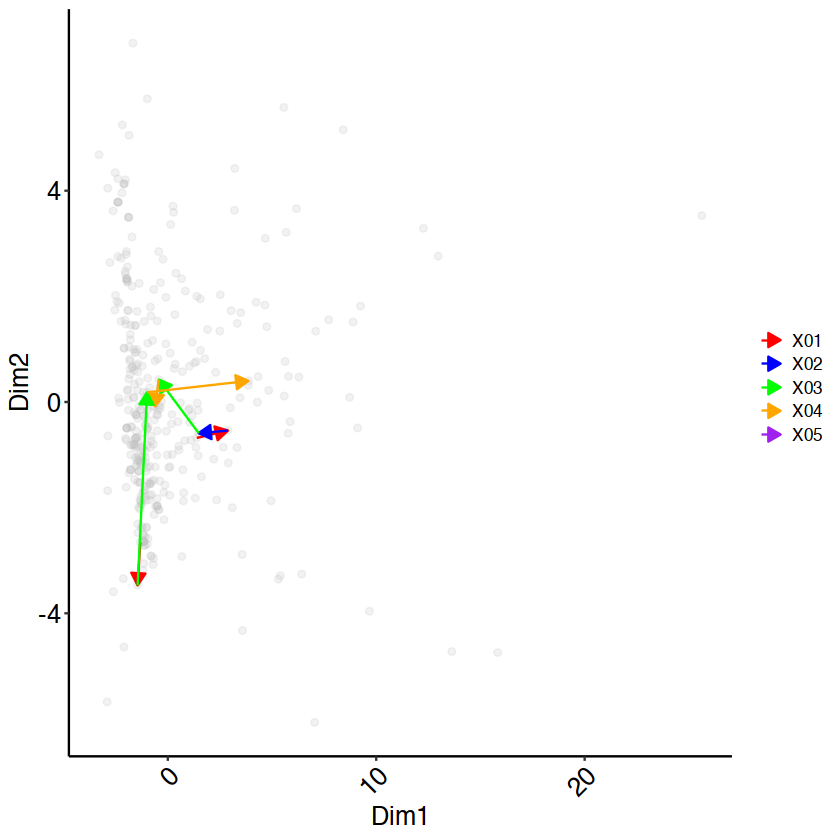

In [111]:
ggplot(data = sample_df, aes(x = Dim1, y = Dim2)) + geom_point(alpha = 0.2, color = "grey") +
geom_path(data = sample_df[sample_df$Patient %in% c("CHP_350", "CHP_398"),], aes(group = Patient, color = cycle), arrow = arrow(length=unit(0.30,"cm"), ends="last", type = "closed")) +
myplot + myaxis + scale_color_manual(values = c("red", "blue", "green", "orange", "purple", "black", "brown", "pink", "grey", "yellow") )

In [243]:
sample_df$sumdist_n <- allpts_no0$sumdist_n[ match(sample_df$Patient, allpts_no0$Var1)]
sample_df$sumdist <- allpts_no0$sumdist[ match(sample_df$Patient, allpts_no0$Var1)]

Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


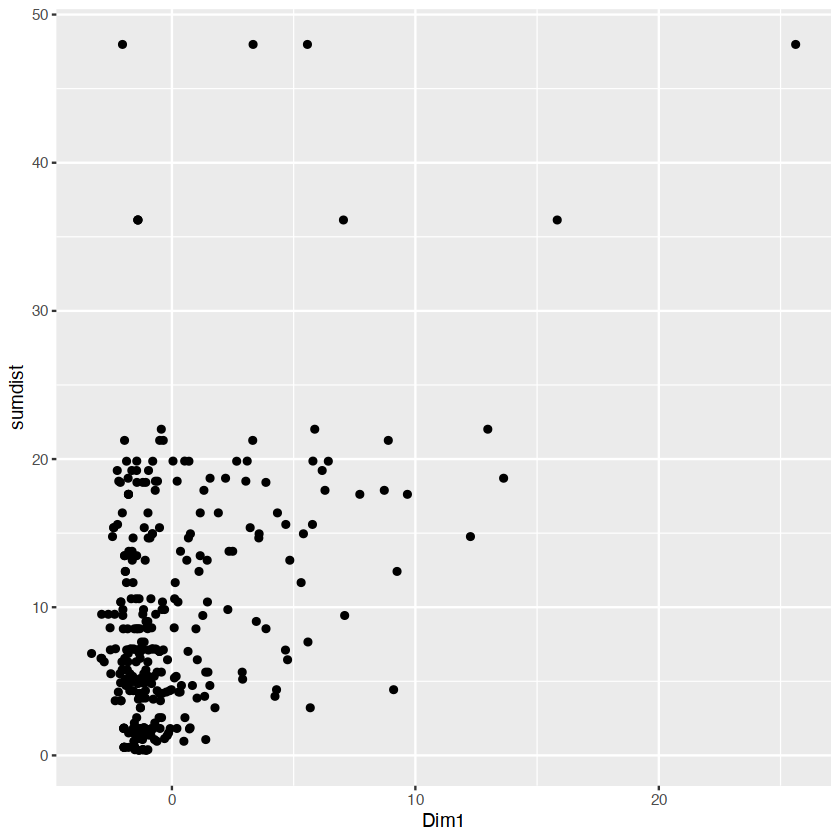

In [246]:
ggplot(data = sample_df, aes(x = Dim1, y = sumdist)) + geom_point() 

In [257]:
head(sample_df)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_Flu,cfDNA_hs,cyclenum,Avereads_perc,Maxreads_perc,dist,Dim1,Dim2,sumdist_n,sumdist
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,NA,NA,1,0.028571429,0.09716599,NA,-0.1934348,-1.71166932,0.2672483,1.336241
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,1,0.006410256,0.03983657,NA,0.2151346,-0.99257816,3.7012640,18.506320
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,1,0.011111111,0.05147059,NA,-0.3024969,0.01052608,0.5655743,1.131149
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,1,0.055555556,0.17004831,NA,-1.3924838,-0.99884560,0.9694325,4.847163
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,NA,NA,1,0.006535948,0.03582271,NA,1.3881835,-0.68028148,1.1236870,5.618435
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,NA,NA,1,0.052631579,0.19034091,NA,-1.4432948,-2.30983780,NA,NA


In [194]:
myfit <- rms::lrm( Relapse ~ sumdist*cancergroup, data = sample_df[!duplicated(sample_df$Patient),])

ERROR: Error in eval(predvars, data, callenv): object 'sumdist' not found


In [1]:
print(myfit)

ERROR: Error in print(myfit): object 'myfit' not found


In [247]:
table(sample_df$Relapse)


  0   1 
290  78 

In [272]:
head(rownames(myave))

[1] "CHP_319_05" "CHP_323_03" "CHP_323_05" "CHP_324_05" "CHP_328_04"
[6] "CHP_328_05"

In [282]:
myfit <- rms::lrm( Relapse ~ myave*cancergroup, data = sample_df[sample_df$cycle == "X01",])

In [283]:
print(myfit)

Logistic Regression Model

rms::lrm(formula = Relapse ~ myave * cancergroup, data = sample_df[sample_df$cycle == 
    "X01", ])

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs             87    LR chi2      7.57     R2       0.135    C       0.664    
 0              71    d.f.            7     R2(7,87) 0.006    Dxy     0.327    
 1              16    Pr(> chi2) 0.3725    R2(7,39.2)0.014    gamma   0.329    
max |deriv| 0.0001                          Brier    0.137    tau-a   0.099    

                                        Coef      S.E.     Wald Z Pr(>|Z|)
Intercept                                 -1.6118   0.4992 -3.23  0.0012  
myave                                     -0.3710   0.3680 -1.01  0.3134  
cancergroup=Lymphoma                      -0.9468   1.1529 -0.82  0.4115  
cancergroup=Solid tumors                   0.2651   0.6870  0.39  0.6996  
cancergroup=T-c

In [273]:
sample_df$myave <- myave[ match(sample_df$sample_id, rownames(myave)),1]

Warning message:
“Removed 16 rows containing missing values (`geom_point()`).”


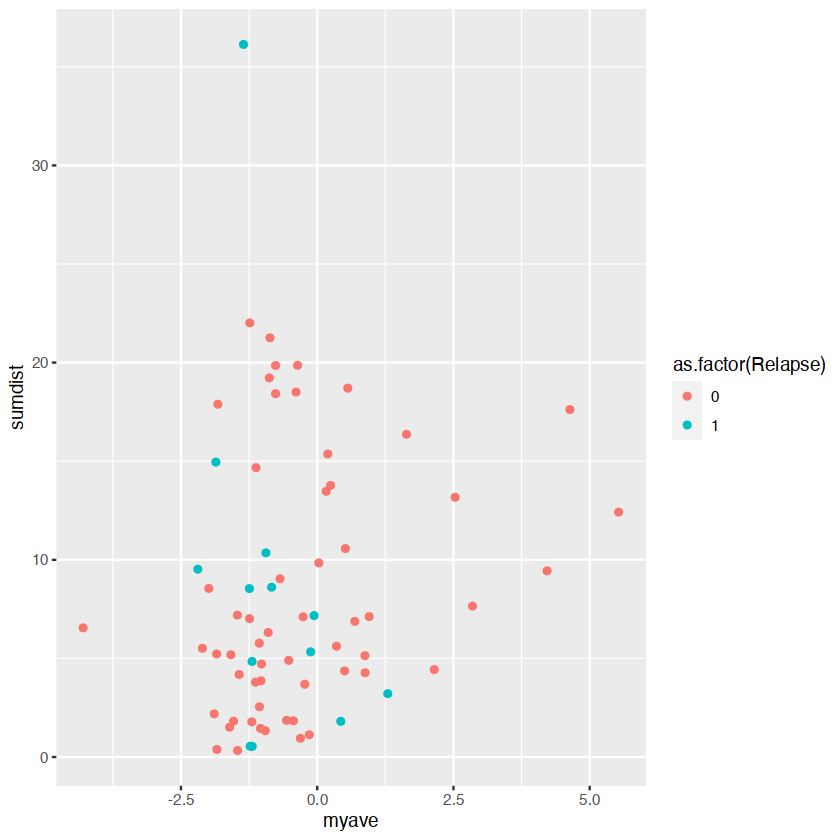

In [279]:
ggplot(data = sample_df[sample_df$cycle == "X01",], aes(x = myave, y = sumdist, color = as.factor(Relapse)) ) + geom_point() 

Heatmap

In [191]:
makematrix_4hm <- function(df, var, name) {
    mymat <- df[[var]]
    names(mymat) <- df[["Patient"]]
    mymat <- t(as.matrix(mymat))
    rownames(mymat) <- name
    return(mymat)
}

In [193]:
mycohort <- makematrix_4hm(mypatients, "Disease_type", "disease")
mysample <- makematrix_4hm(mypatients, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(mypatients, "Relapse", "Relapse")
myage <- makematrix_4hm(mypatients, "Age", "Age")

In [194]:
age_col <- c("blue", "red")
# atc_col <- c("blue", "red")

In [195]:
group_col <- c("blue", "red")
names(group_col) <- names(table(mypatients$Relapse))

In [196]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [197]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(mypatients$cancergroup))

In [198]:
age_hm <- Heatmap(myage, col = age_col,  height = unit(1,"cm"))
# atc_hm <- Heatmap(myatc, col = atc_col,  height = unit(1,"cm"))

In [199]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col , height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col, height = unit(1,"cm"))

In [200]:
hm <- Heatmap(t(scale(mypatients$sumdist_n)), cluster_columns = F)

In [201]:
dim(mypatients)

[1]  76 126

In [202]:
# pivot_wider
wider_df <- tidyr::pivot_wider(mysample_df, names_from = cycle, values_from = dist, id_cols = Patient) 

wider_df[ wider_df$Patient == "CHP_350",]

Patient,X01,X03,X04,X05
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_350,NA,1.371681,2.233221,0.446518


In [203]:
wider_df <- as.data.frame(wider_df)
rownames(wider_df) <- wider_df$Patient
wider_df$Patient <- NULL
wider_df$X01 <- NULL

In [204]:
head(wider_df)

,X03,X04,X05
,<dbl>,<dbl>,<dbl>
CHP_347,3.9156290,3.635448,8.042083
CHP_349,1.8592373,0.000000,0.000000
CHP_350,1.3716814,2.233221,0.446518
CHP_357,7.9157050,2.048401,4.395232
CHP_361,0.9177626,3.255954,NA
CHP_362,3.2378620,2.511704,2.423694


In [207]:
# mysample_df[ mysample_df$Patient == "CHP_348",]

In [208]:
hm1 <- Heatmap(t(scale(wider_df)), cluster_columns = F, name = "dists")

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,Avereads_perc,Maxreads_perc,dist,sumdist_n,meddist_n
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,NA,NA,NA,NA,1,0.028571429,0.09716599,NA,0.2672483,0.2672483
2,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,1,0.006410256,0.03983657,NA,3.7012640,0.7654901
3,CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,1,0.011111111,0.05147059,NA,0.5655743,0.5655743
4,CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,1,0,0,1,0.055555556,0.17004831,NA,0.9694325,0.4847163
5,CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,NA,NA,NA,NA,1,0.006535948,0.03582271,NA,1.1236870,0.2913978
10,CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,1,1,0,2,1,0.003344482,0.01241912,NA,3.2733345,0.7024551


In [124]:
print(myfit)

Logistic Regression Model

rms::lrm(formula = Relapse ~ meddist * cancergroup, data = mypatients)

                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            81    LR chi2     12.08     R2       0.225    C       0.694    
 0             66    d.f.            7     R2(7,81) 0.061    Dxy     0.389    
 1             15    Pr(> chi2) 0.0981    R2(7,36.7)0.129    gamma   0.389    
max |deriv| 0.001                          Brier    0.125    tau-a   0.119    

                                          Coef    S.E.    Wald Z Pr(>|Z|)
Intercept                                 -2.3735  0.6795 -3.49  0.0005  
meddist                                    0.2114  0.1040  2.03  0.0420  
cancergroup=Lymphoma                       1.6793  2.4236  0.69  0.4884  
cancergroup=Solid tumors                   1.7550  1.2242  1.43  0.1517  
cancergroup=T-cell malignancies           12.8447 60.759

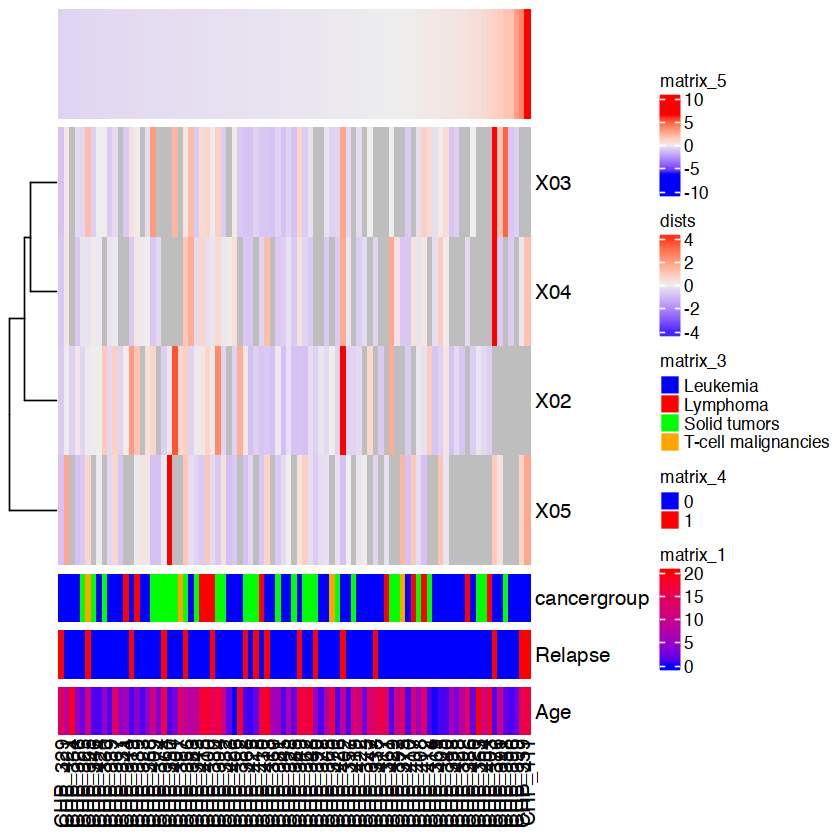

In [161]:
hm %v% hm1 %v% sample_hm %v% group_hm %v% age_hm

Warning message:
“Column names of heatmap 3 are not consistent with the main heatmap (1).
It may lead to wrong conclusion of your data. Please double check.”


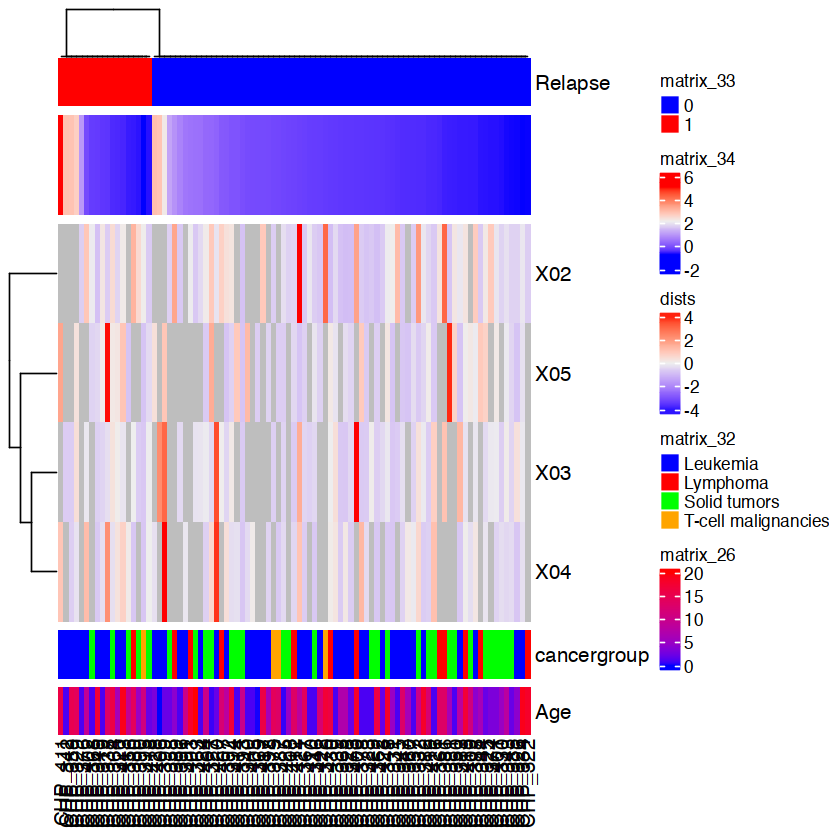

In [214]:
group_hm %v% hm %v% hm1 %v% sample_hm  %v% age_hm 

In [215]:
ls()

[1] "addjurkat.fx"       "age_col"            "age_hm"            
 [4] "age_pal"            "align_plots1"       "allpts"            
 [7] "allpts_no0"         "cohort_col"         "cohort_hm"         
[10] "cycle_col"          "datapath"           "distances_df"      
[13] "gitpath"            "group_col"          "group_hm"          
[16] "h4hpath"            "histdenp"           "histp"             
[19] "hm"                 "hm1"                "i"                 
[22] "imp"                "makematrix_4hm"     "manifestpath"      
[25] "message_parallel"   "myage"              "myaxis"            
[28] "mycohort"           "mycols"             "mydiff"            
[31] "mydist"             "myfit"              "mygroup"           
[34] "mymat"              "mypatients"         "myplot"            
[37] "mysample"           "mysample_df"        "myx"               
[40] "plotpath"           "pts"                "res"               
[43] "res.comp"           "res.pca"            "safe_mclapply"     
[46] "sample_df"          "sample_hm"          "sampletags_columns"
[49] "text_matrix"        "tmp"                "toString_onefle.fx"
[52] "type_col"           "viz_pca"            "wider_df"

In [ ]:
rm(tmp, wider_df, pts, myx, imp, mysample, mysample_df, allpts, allpts_no0, distances_df, hm, hm1, i, mydiff, mydist, myfit, mymat_narm, pca, sample_df_narm)

# Impute with rms

In [297]:
pacman::p_load(rms)

In [298]:
dim(sample_df)

[1] 407 124

In [299]:
mycols <- gsub("%", "_p", mycols)

In [300]:
colnames(sample_df) <- gsub("%", "_p", colnames(sample_df))

In [301]:
colnames(sample_df)

[1] "sample_id"                "Patient"                 
  [3] "cycle"                    "FOLD"                    
  [5] "ATC"                      "Age"                     
  [7] "Disease_type"             "TE_fold"                 
  [9] "CD3"                      "EM"                      
 [11] "CM"                       "Naïve"                   
 [13] "SCM"                      "TE"                      
 [15] "EM_p"                     "CM_p"                    
 [17] "Naïve_p"                  "SCM_p"                   
 [19] "TE_p"                     "Naïve/TE"                
 [21] "N+CM+SCM/TE+EM"           "PD-1"                    
 [23] "PDL1"                     "LAG3"                    
 [25] "TIM3"                     "CTLA4"                   
 [27] "PD1_p"                    "PDL1_p"                  
 [29] "LAG3_p"                   "TIM3_p"                  
 [31] "CTLA4_p"                  "Any NCR"                 
 [33] "PD1 + LAG3 + TIM3"        "cancergroup"             
 [35] "agegroup"                 "foldgroup"               
 [37] "Remission"                "Relapse"                 
 [39] "Transplant"               "CART"                    
 [41] "vital_status"             "LOF"                     
 [43] "TRB"                      "Reads"                   
 [45] "CPKR"                     "Average_reads"           
 [47] "VMR"                      "Max_reads"               
 [49] "Singletons"               "Doubletons"              
 [51] "qD"                       "Sample_Coverage"         
 [53] "observed_Richness"        "estimated_Richness"      
 [55] "SE_Richeness"             "observed_Shannon"        
 [57] "estimated_Shannon"        "SE_Shannon"              
 [59] "observed_Simpson"         "estimated_Simpson"       
 [61] "SE_Simpson"               "basename"                
 [63] "file"                     "sampletype"              
 [65] "Group"                    "log10shann"              
 [67] "aveTiRP"                  "medTiRP"                 
 [69] "HLA_PC1"                  "HLA_PC2"                 
 [71] "HLA_PC3"                  "V_PC1"                   
 [73] "V_PC2"                    "V_PC3"                   
 [75] "J_PC1"                    "J_PC2"                   
 [77] "J_PC3"                    "samplename"              
 [79] "gliph_n"                  "CMV"                     
 [81] "EBV"                      "HCV"                     
 [83] "Flu"                      "hs"                      
 [85] "cfDNA_TRB"                "cfDNA_Reads"             
 [87] "cfDNA_CPKR"               "cfDNA_Average_reads"     
 [89] "cfDNA_VMR"                "cfDNA_Max_reads"         
 [91] "cfDNA_Singletons"         "cfDNA_Doubletons"        
 [93] "cfDNA_qD"                 "cfDNA_Sample_Coverage"   
 [95] "cfDNA_observed_Richness"  "cfDNA_estimated_Richness"
 [97] "cfDNA_SE_Richeness"       "cfDNA_observed_Shannon"  
 [99] "cfDNA_estimated_Shannon"  "cfDNA_SE_Shannon"        
[101] "cfDNA_observed_Simpson"   "cfDNA_estimated_Simpson" 
[103] "cfDNA_SE_Simpson"         "cfDNA_basename"          
[105] "cfDNA_file"               "cfDNA_sampletype"        
[107] "cfDNA_Group"              "cfDNA_log10shann"        
[109] "cfDNA_aveTiRP"            "cfDNA_medTiRP"           
[111] "cfDNA_V_PC1"              "cfDNA_V_PC2"             
[113] "cfDNA_V_PC3"              "cfDNA_J_PC1"             
[115] "cfDNA_J_PC2"              "cfDNA_J_PC3"             
[117] "cfDNA_samplename"         "cfDNA_gliph_n"           
[119] "cfDNA_CMV"                "cfDNA_EBV"               
[121] "cfDNA_HCV"                "cfDNA_Flu"               
[123] "cfDNA_hs"                 "cyclenum"

In [278]:
ipc_r <- prcomp( formula( paste("~", paste(mycols[!grepl("TIM3", mycols)]) ) ),
data = sample_df)

Warning message:
“Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead.”
Warning message:
“Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead.”


ERROR: Error in svd(x, nu = 0, nv = k): infinite or missing values in 'x'


In [302]:
ptrans <- transcan(  as.formula( paste("~", paste(mycols[!grepl("TIM3", mycols)], collapse = "+") ) ) ,
imputed=TRUE , transformed =TRUE , data= sample_df , pl= FALSE , pr= FALSE, iter.max = 100)

Warning message in rcspline.eval(y, nk = nk, inclx = TRUE):
“could not obtain 5 interior knots with default algorithm.
 Used alternate algorithm to obtain 4 knots”


In [303]:
trans <- ptrans$transformed

In [321]:
imp <- impute(ptrans , data= sample_df , list.out= TRUE)



Imputed missing values with the following frequencies
 and stored them in variables with their original names:

            FOLD              ATC          Naïve_p            SCM_p 
               4                7              210              210 
            CM_p             EM_p             TE_p            PD1_p 
             210              210              210              215 
          LAG3_p            Reads    Average_reads              VMR 
             215              210              210              211 
       Max_reads       Singletons       Doubletons observed_Shannon 
             210              210              210              210 
         aveTiRP          medTiRP          HLA_PC1          HLA_PC2 
             213              213              119              119 
         HLA_PC3            V_PC1            V_PC2            V_PC3 
             119              211              211              211 
           J_PC1            J_PC2            J_PC3 
      

In [330]:
names(imp)

[1] "FOLD"             "ATC"              "Naïve_p"          "SCM_p"           
 [5] "CM_p"             "EM_p"             "TE_p"             "PD1_p"           
 [9] "LAG3_p"           "Reads"            "Average_reads"    "VMR"             
[13] "Max_reads"        "Singletons"       "Doubletons"       "observed_Shannon"
[17] "aveTiRP"          "medTiRP"          "HLA_PC1"          "HLA_PC2"         
[21] "HLA_PC3"          "V_PC1"            "V_PC2"            "V_PC3"           
[25] "J_PC1"            "J_PC2"            "J_PC3"            "gliph_n"         
[29] "CMV"              "EBV"              "HCV"              "Flu"             
[33] "hs"

In [331]:
NAvars <- all.vars( as.formula( paste("~", paste(names(imp), collapse = "+") ) ))

In [332]:
NAvars

[1] "FOLD"             "ATC"              "Naïve_p"          "SCM_p"           
 [5] "CM_p"             "EM_p"             "TE_p"             "PD1_p"           
 [9] "LAG3_p"           "Reads"            "Average_reads"    "VMR"             
[13] "Max_reads"        "Singletons"       "Doubletons"       "observed_Shannon"
[17] "aveTiRP"          "medTiRP"          "HLA_PC1"          "HLA_PC2"         
[21] "HLA_PC3"          "V_PC1"            "V_PC2"            "V_PC3"           
[25] "J_PC1"            "J_PC2"            "J_PC3"            "gliph_n"         
[29] "CMV"              "EBV"              "HCV"              "Flu"             
[33] "hs"

In [333]:
for(x in NAvars ) sample_df[[x]] <- imp[[x]]

In [334]:
table(sample_df$Relapse)


  0   1 
324  83 

In [335]:
trans_fit <- lrm(Relapse ~ trans, data = sample_df)

In [336]:
myf <- as.formula( paste("Relapse ~", paste(mycols[!grepl("TIM3", mycols)], collapse = "+") ) )

In [339]:
raw_fit <- lrm( myf, data = sample_df ) 

In [340]:
AIC(trans_fit)
AIC(raw_fit)

[1] 452.0226

[1] 431.8858

In [356]:
pca_raw <- prcomp( sample_df[,mycols[!grepl("TIM3", mycols)] ])$x[,1:5]

In [355]:
pca_trans <- prcomp( trans[,mycols[!grepl("TIM3", mycols)] ])$x[,1:5]

In [358]:
pcaraw_fit <- lrm( Relapse ~ pca_raw, data = sample_df ) 
pcatrans_fit <- lrm(Relapse ~ pca_trans, data = sample_df )

In [359]:
AIC(pcaraw_fit)
AIC(pcatrans_fit)

[1] 417.5353

[1] 417.3774